# BASIC FEATURES

This tutorial is intended to show the usual workflow of a Logarithm Negativity measurement of a Gaussian State over which a Bogoliubov transformation has been performed. 

We start by importing the main class of the suite ```LogNegManager```. With this class we will be able to define a list of initial states, to reconstruct the transformation matrix from a data set, to compute the desired LogNeg measurements and to plot the results. As some dictionaries are needed to instantiate this class, we will also import some Enums classes to not commit typos in the typing of the parameters, although this latter part is not necessary as all keys in the dictionaries are strings.

In [23]:
import sys
import os
repoRoot = os.path.abspath(os.path.join('..'))
sys.path.append(repoRoot)

from src.LogNegManager import LogNegManager
from src.TypesAndParameters import TypeOfMeasurement, InitialStateParameters, TransformationMatrixParameters, MeasurementParameters, GeneralOptionsParameters

## Stating the parameters of the simulation and the measurements

The ```generalOptions``` dictionary allow for defining the number of modes that we will have and the directories to use for data and plots storing.
It also allows for activating the parallelize option, which will work under the package ```joblib```. 

The next dictionary is ```transformationMatrixOptions```. In this case we will upload the information to reconstruct the transformation matrix from a data set. Therefore we have to specify the directory and the instant of tiem that we wnat to extract from the data set (see "example_data/data_info.md").

The next parameters is a list called ```initialStates```. Each element of the list will be a different initial states. We can specify the temperature, the one mode squeezing and the two mode squeezing of this initial state (one mode and two mode squeezing cannot be different from zero at the same time).

The final parameter, which will not be used in the class instantiation but later, is the ```measurements``` list. Each element will be a measurement which will be performed onto each individual state from the ```initialStates``` list. One have to specify the type of measurement, the specific modes to apply it (numered from 1 to N), and the moment of the initial state to compute this measurement (0 for in states, 1 for out states).

In [24]:
generalOptions =  {
        GeneralOptionsParameters.NUM_MODES.value: 10,
        GeneralOptionsParameters.PLOTS_DIRECTORY.value: "./plots/10-plots/",
        GeneralOptionsParameters.DATA_DIRECTORY.value: "./data/10-data/",
        GeneralOptionsParameters.BASE_DIRECTORY.value: "../",
        GeneralOptionsParameters.PARALLELIZE.value: True
      }

transformationMatrixOptions = {
        TransformationMatrixParameters.DATA_DIRECTORY.value: "../example_data/10modes/",
        TransformationMatrixParameters.INSTANT_TO_PLOT.value: -1
      }

initialStates = [
          {InitialStateParameters.TEMPERATURE.value:  0.0,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0}, # Vacuum

            {InitialStateParameters.TEMPERATURE.value:  1.0,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0}, # Thermal

            {InitialStateParameters.TEMPERATURE.value:  0.0,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.5,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0}, # One mode squeezed

            {InitialStateParameters.TEMPERATURE.value:  0.0,
          InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
            InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.5}, # Two mode squeezed


        ]

measurements = [
        {MeasurementParameters.TYPE.value: TypeOfMeasurement.FullLogNeg.value}, # 1 vs (N-1) LogNeg for all modes onto the out state (default)


        {MeasurementParameters.TYPE.value: TypeOfMeasurement.FullLogNeg.value,
         MeasurementParameters.TYPE_OF_STATE.value: 0,
         MeasurementParameters.MODES_TO_APPLY.value: [1,2,3,4,5]},      # 1 vs (N-1) LogNeg for selected mode in modesToApply onto the in state

        {MeasurementParameters.TYPE.value: TypeOfMeasurement.HighestOneByOne.value} # Major contribution for each mode for the 1 vs 1 LogNeg
        

      ]

## Instantiate the main class LogNegManager

In [25]:
LNManager = LogNegManager(generalOptions=generalOptions, transformationDict=transformationMatrixOptions, initialStates=initialStates)

## Perform the measurements

For each measurement in the measurements list, a dictionary with all the necessary information will be returned. This exact dictionary will be also be saved as an .npz file

In [26]:
collection_of_dict_to_plot = []
for measurement in measurements:
    collection_of_dict_to_plot.append(LNManager.measureEntanglement(measurement))

## Visualize results

Using the dictionaries from the previous step, one can easily call the method ```plotResults``` from the LogNegManager class and visualize a different plot for each different type of peasurement

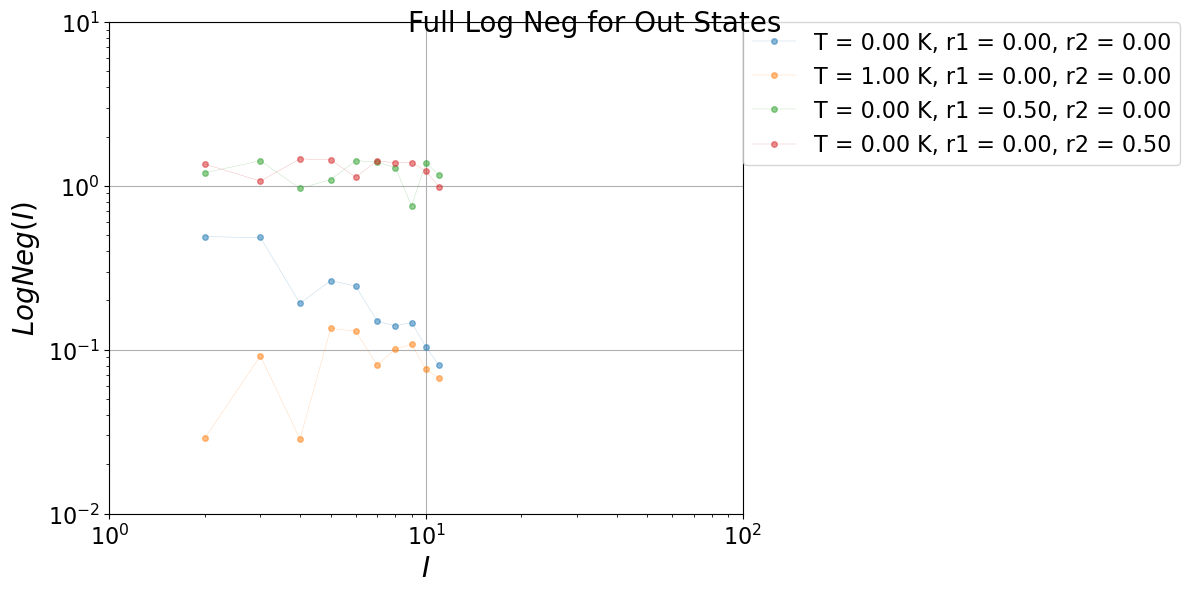

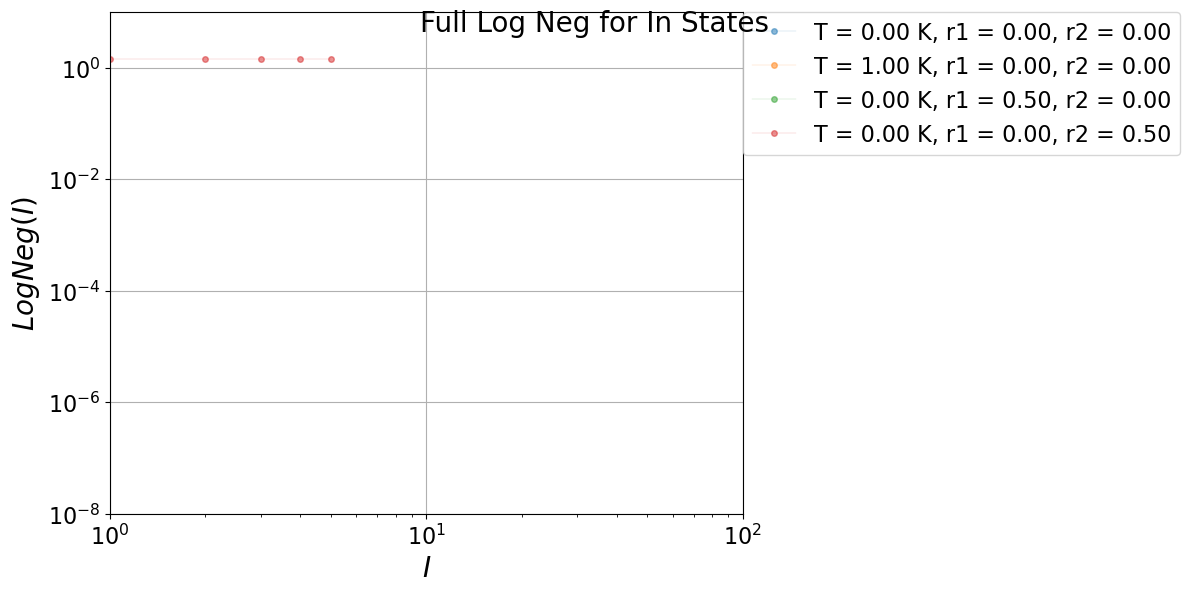

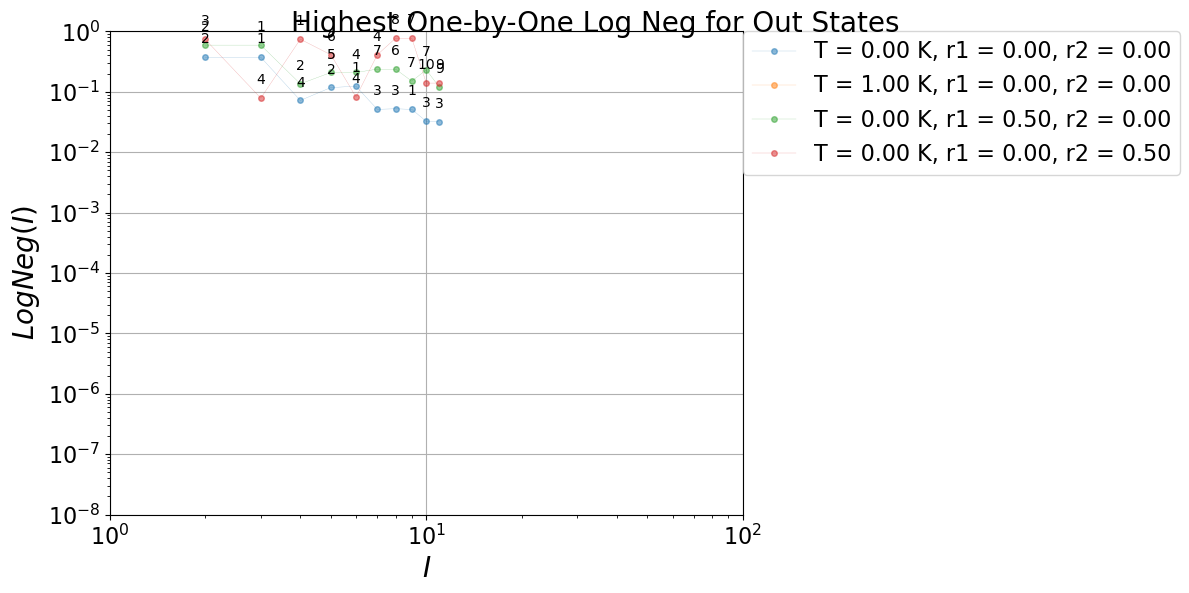

In [27]:
for dict_to_plot in collection_of_dict_to_plot:
    LNManager.plotResults(dict_to_plot)